In [264]:
import pandas as pd
from typing import List, Dict, Tuple

In [265]:
df = pd.read_csv('data/heart_2020_cleaned.csv')
train = pd.read_csv('data/heart_train.csv')
val = pd.read_csv('data/heart_val.csv')
test = pd.read_csv('data/heart_test.csv')

In [305]:
train

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,23.44,Yes,No,No,0.0,1.0,No,Female,65-69,White,No,Yes,Good,7.0,No,No,No
1,No,23.11,No,No,No,0.0,0.0,No,Male,60-64,White,No,No,Excellent,7.0,No,No,No
2,No,35.51,No,No,No,2.0,1.0,No,Female,75-79,Black,No,Yes,Good,7.0,No,No,No
3,No,21.79,No,No,No,0.0,0.0,No,Female,50-54,White,Yes (during pregnancy),Yes,Excellent,8.0,No,No,No
4,No,47.59,Yes,No,No,30.0,20.0,Yes,Male,45-49,White,No,Yes,Poor,6.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223851,No,30.81,Yes,No,Yes,0.0,0.0,No,Male,65-69,White,No,Yes,Excellent,5.0,Yes,No,No
223852,Yes,31.45,Yes,No,No,4.0,0.0,Yes,Female,75-79,White,Yes,No,Very good,10.0,No,Yes,No
223853,No,18.89,No,No,No,0.0,0.0,No,Female,35-39,White,No,Yes,Excellent,7.0,No,No,No
223854,No,25.02,No,No,No,0.0,0.0,No,Male,80 or older,White,Yes,Yes,Good,8.0,No,No,No


In [256]:
print("raw",df.shape)
print("train",train.shape)
print("val",val.shape)
print("test",test.shape)


raw (319795, 18)
train (223856, 18)
val (47969, 18)
test (47970, 18)


In [155]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [268]:
white=val.loc[lambda val: val['Race'] == "White"]
black=val.loc[lambda val: val['Race'] == "Black"]

# EDA 

In [258]:
#Original data
print("Length of original dataset:", len(df))

#Train data, i.e. 70%
print("Length of train dataset:", len(train))

#Validation data, i.e. 15%
print("Length of validation dataset:", len(val))

#Test data, i.e. 15%
print("Length of test dataset:", len(test))

Length of original dataset: 319795
Length of train dataset: 223856
Length of validation dataset: 47969
Length of test dataset: 47970


First we will do some initial data analysis to show the distribution of the columns we are interested in. 

In [78]:
%matplotlib inline

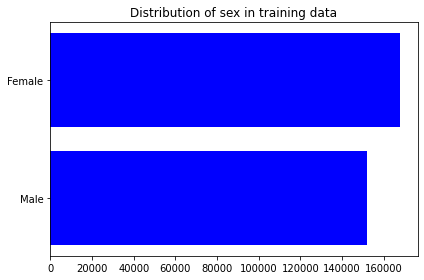

In [83]:
plt.barh(df["Sex"].unique(),df["Sex"].value_counts(), color="blue")
plt.title("Distribution of sex in training data")
plt.gca().invert_yaxis()
plt.tight_layout()

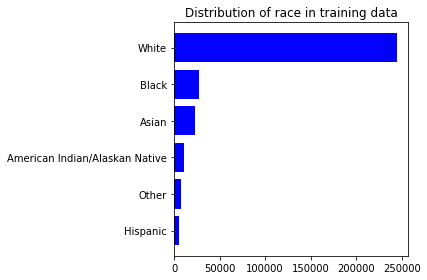

In [81]:
plt.barh(df["Race"].unique(),df["Race"].value_counts(), color="blue")
plt.title("Distribution of race in training data")
plt.gca().invert_yaxis()
plt.tight_layout()

['80 or older', '80 or older', '80 or older', '75-79', '75-79', '75-79', '70-74', '65-69', '65-69', '60-64', '55-59', '55-59', '40-44'] [33686, 21482, 21064, 29757, 24153, 16955, 21791, 31065, 21006, 20550, 34151, 18753, 25382]
Unique ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
[('80 or older', 33686), ('80 or older', 21482), ('80 or older', 21064), ('75-79', 29757), ('75-79', 24153), ('75-79', 16955), ('70-74', 21791), ('65-69', 31065), ('65-69', 21006), ('60-64', 20550), ('55-59', 34151), ('55-59', 18753), ('40-44', 25382)]


<BarContainer object of 13 artists>

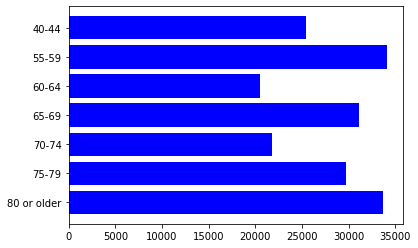

In [259]:
names = []
values = []
for name, val in sorted(zip(df["AgeCategory"], df["AgeCategory"].value_counts()), reverse=True):
    names.append(name)
    values.append(val)
    
print(names, values)
print("Unique", df["AgeCategory"].unique())

print(sorted(zip(df["AgeCategory"], df["AgeCategory"].value_counts()), reverse=True))
plt.barh(names,values, color="blue")

#plt.barh(df["AgeCategory"].unique(),df["AgeCategory"].value_counts(), color="blue")
#plt.title("Distribution of age in training data")
#plt.gca().invert_yaxis()
#plt.tight_layout()

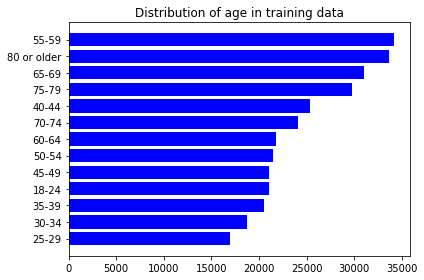

In [104]:
plt.barh(df["AgeCategory"].unique(),df["AgeCategory"].value_counts(), color="blue")
plt.title("Distribution of age in training data")
plt.gca().invert_yaxis()
plt.tight_layout()

# Model preparation

In [296]:
# Preprocessing data

categorical_features = [
    "Smoking",
    "AlcoholDrinking",
    "Stroke",
    "DiffWalking",
    "Sex",
    "AgeCategory",
    "Race",
    "Diabetic",
    "PhysicalActivity",
    "GenHealth",
    "Asthma",
    "KidneyDisease",
    "SkinCancer"
]

continuos_features = [
    "BMI",
    "PhysicalHealth",
    "MentalHealth"
]

target_variable = "HeartDisease"

def data_preprocessing(data: pd.DataFrame, categorical_features: List[str], continuous_features: List[str], target_variable: str):

    df = data.copy()

    # protected variables
    sex = df["Sex"].values
    age = df["AgeCategory"].values
    race = df["Race"].values

    # target
    target = df[target_variable].values

    df_processed = df[categorical_features + continuous_features]
    df_processed = pd.get_dummies(df_processed, prefix=None, prefix_sep='_', dummy_na=False, columns=categorical_features, drop_first=True)

    return df_processed, df, target, sex, age, race

#df_processed, df_original, target, sex, age, race = data_preprocessing(df, categorical_features=categorical_features, continuous_features=continuos_features, target_variable=target_variable)
train_processed, train_original, train_target, train_sex, train_age, train_race = data_preprocessing(train, categorical_features=categorical_features, continuous_features=continuos_features, target_variable=target_variable)
val_processed, val_original, val_target, val_sex, val_age, val_race = data_preprocessing(val, categorical_features=categorical_features, continuous_features=continuos_features, target_variable=target_variable)

In [297]:
# just renaming stuff
X_train, X_val = train_processed.values, val_processed.values
y_train, y_val = train_target, val_target

In [272]:
# Fairness metric function
def equailized_odds(preds, groups, test):
    print('Equalized Odds')
    df = pd.DataFrame(list(zip(preds, groups, test)), columns=['preds', 'groups', 'test'])
    labels = []
    y = []
    total_class_difference = 0
    for target in df['test'].unique():
        for group in df['groups'].unique():
            selection = df.loc[(df['test'] == target) & (df['groups'] == group)]
            corrects = selection.loc[selection['preds'] == True]
            score = round(len(corrects) / len(selection), 3)
            print(f'Target [{target}] and group [{group}]: {score} ')
            labels.append(f'T: {target}, G: {group}')
            y.append(score)

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


              precision    recall  f1-score   support

          No       0.91      1.00      0.96     43863
         Yes       0.00      0.00      0.00      4106

    accuracy                           0.91     47969
   macro avg       0.46      0.50      0.48     47969
weighted avg       0.84      0.91      0.87     47969



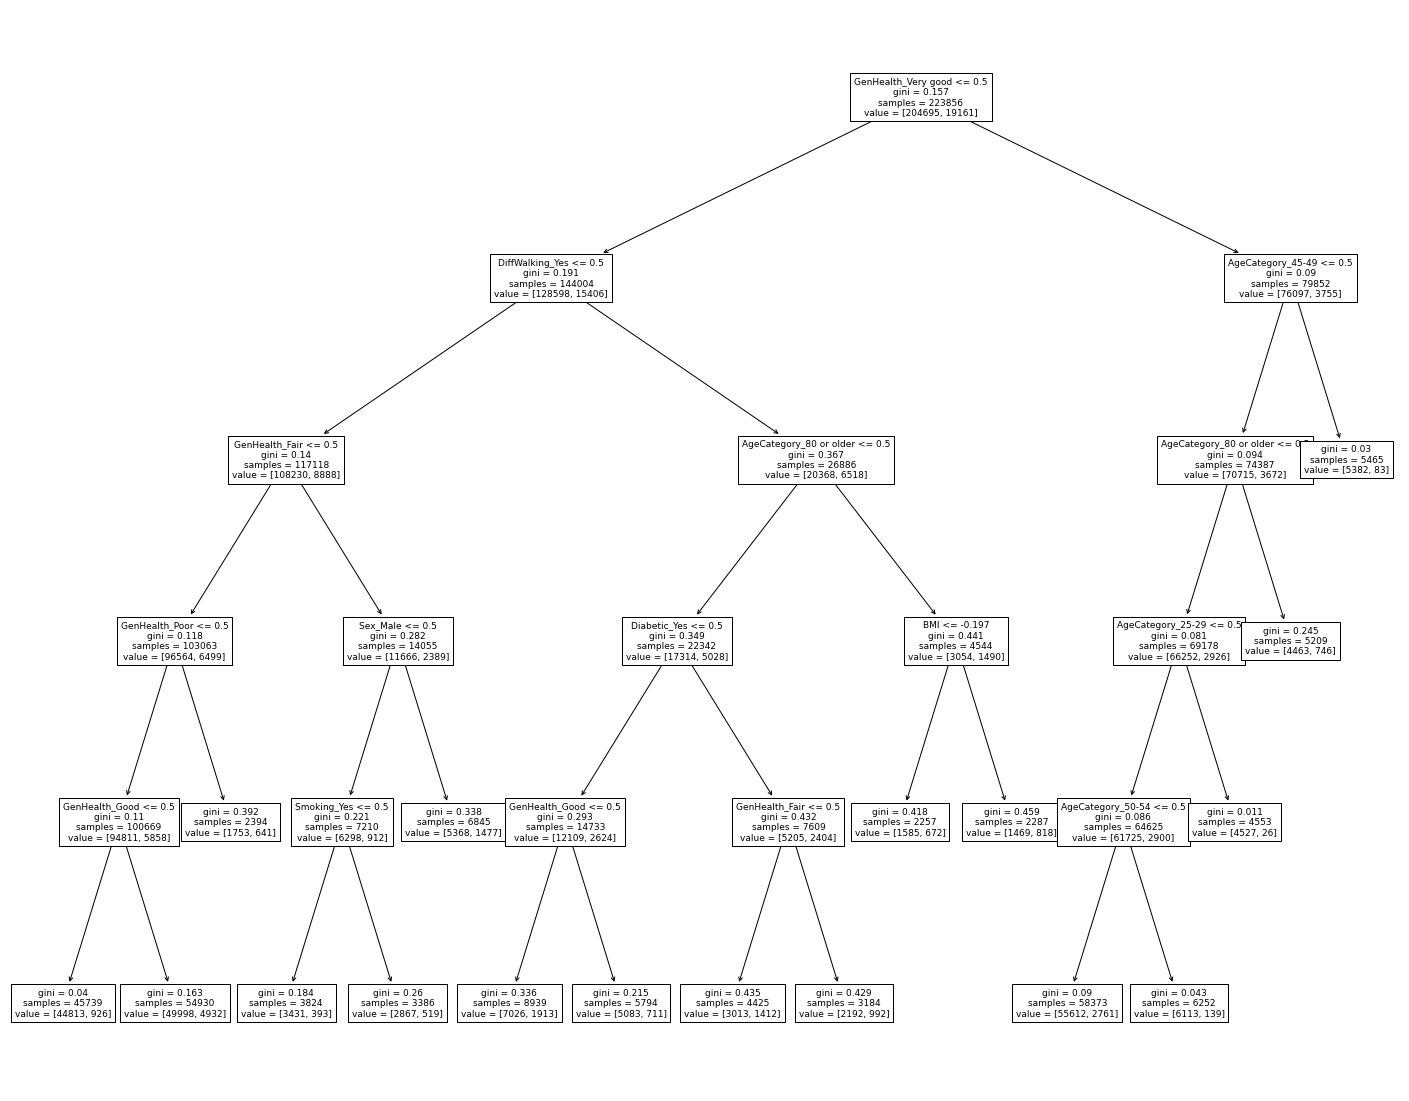

In [298]:
# Train whitebox model

# Scale continuous variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
scaler = ColumnTransformer([('scaler', StandardScaler(), continuos_features)], remainder='passthrough')

# Whitebox model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

whitebox_model = Pipeline(steps=[('scaler', scaler), ('clf', DecisionTreeClassifier(min_samples_split = 0.01, min_samples_leaf= 0.01, max_features="auto", max_depth = 5, criterion = "gini", random_state = 42))])
##whitebox_model = Pipeline(steps=[('scaler', scaler), ('clf', DecisionTreeClassifier(random_state = 42))])

#whitebox_model.fit(X_train, y_train)
whitebox_model.fit(train_processed, y_train)

#Min del
#scaler = whitebox_model.best_estimator_.named_steps['scl']
#classifier = whitebox_model.best_estimator_.named_steps['clf']
#print("Importances", whitebox_model.named_steps['clf'].coef_[0])

y_pred_whitebox = whitebox_model.predict(val_processed)
y_pred_proba_whitebox = whitebox_model.predict_proba(val_processed)

print(classification_report(y_val, y_pred_whitebox))

# # plot tree
plt.figure(figsize=(25,20))  # set plot size (denoted in inches)
tree.plot_tree(whitebox_model['clf'], fontsize=9, feature_names=train_processed.columns)
plt.show()


In [251]:
val_processed.head()

,BMI,PhysicalHealth,MentalHealth,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,AgeCategory_30-34,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,26.79,0.0,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,23.05,0.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,20.47,0.0,1.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,1
3,46.06,10.0,0.0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,33.38,0.0,0.0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


### Feature Importance

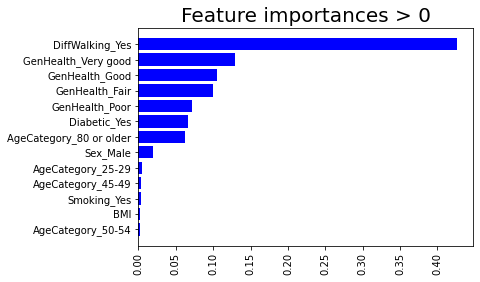

In [10]:
columns =[]
importances = []
#print( sorted(whitebox_model.named_steps['clf'].feature_importances_, reverse = True))
for importance, name in sorted(zip(whitebox_model.named_steps['clf'].feature_importances_, train_processed.columns), reverse=True):
    #print(name, importance)
    if importance > 0:
        columns.append(name)
        importances.append(importance)

#print(columns, importances)
plt.barh(y=columns, width=importances, color='blue') 
plt.gca().invert_yaxis()
plt.title('Feature importances > 0', size=20)
plt.xticks(rotation='vertical')
plt.show()

We see that the DiffWalking_yes parameter is the one that changes the predictions most. However, this parameter is not one that is 'changeable' realistically, i.e. the individual cannot necessarily does anything about their difficulty walking. Therefore this feature does not qualify for a realistic counterfactual - because it is not realistic that an individual can change this parameter. 
Actually, most of these features are of this type. The only ones that can be changed are the smoking and BMI parameter. Therefore these are the ones, we will focus on in this part.

### Counterfactual data points that contrasts the outcome of the inference on this data point (point in assignment 1)

### SHAP values

In [149]:
import shap
import numpy as np
import sklearn as sk

np.set_printoptions(threshold=np.inf)


In [57]:
print(y_pred_whitebox)

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 

In [50]:
explain = shap.Explainer(y_pred_proba_whitebox, train_processed, feature_names=np.array(train_processed.columns))
#explainer = shap.TreeExplainer(model_white['clf'], X_train, model_output="probability") 
shap_values = explain(X_val)

Exception: Model type not yet supported by TreeExplainer: <class 'numpy.ndarray'>